In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os
print(os.getcwd())

/content


In [4]:
path = "drive/MyDrive/Colab Notebooks/news_classifier/"
bert_m = "Bert_models/uncased_L-8_H-512_A-8.zip"
!nvidia-smi

Sun Oct 24 18:11:56 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.74       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   31C    P8    29W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [5]:
os.chdir(path)
os.getcwd()

'/content/drive/.shortcut-targets-by-id/1RvUYwnlG0R1SpZueiPU3HbcW74cyfvHR/news_classifier'

In [ ]:
# !pip uninstall tensorflow

In [1]:
!pip install tensorflow==2.0.0

     |████████████████████████████████| 86.3 MB 13 kB/s 
     |████████████████████████████████| 3.8 MB 41.4 MB/s 
     |████████████████████████████████| 50 kB 7.2 MB/s 
     |████████████████████████████████| 449 kB 41.0 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=ad1b6339d1e9a094c53a5b4d2de9e033658b4bee661797a1708c899289d9bf1f
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.6.0
    Uninstalling tensorflow-estimator-2.6.0:
      Successfully uninstalled tensorflow-estimator-2.6.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.6.0
    Uninstalling tensorboard-2.6.0:
      Successfully uninstalled tensorboard-2.6.0
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Success

In [2]:
!pip install 'h5py==2.10.0' --force-reinstall

     |████████████████████████████████| 2.9 MB 11.9 MB/s 
     |████████████████████████████████| 15.7 MB 73 kB/s 
  Attempting uninstall: six
    Found existing installation: six 1.15.0
    Uninstalling six-1.15.0:
      Successfully uninstalled six-1.15.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-probability 0.14.1 requires gast>=0.3.2, but you have gast 0.2.2 which is incompatible.
google-colab 1.0.0 requires six~=1.15.0, but you have six 1.16.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompa

In [3]:
!pip install numpy==1.19.5

     |████████████████████████████████| 14.8 MB 205 kB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.3
    Uninstalling numpy-1.21.3:
      Successfully uninstalled numpy-1.21.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-probability 0.14.1 requires gast>=0.3.2, but you have gast 0.2.2 which is incompatible.
google-colab 1.0.0 requires six~=1.15.0, but you have six 1.16.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

!pip install tensorflow-gpu==2.0.0 >> /dev/null

#!pip3 install --upgrade tensorflow-gpu

In [6]:
pip install --upgrade grpcio >> /dev/null

In [7]:
!pip install tqdm  >> /dev/null

In [8]:
!pip install bert-for-tf2 >> /dev/null

In [9]:
!pip install sentencepiece >> /dev/null

In [10]:
import os
import math
import datetime

from tqdm import tqdm

import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow import keras

import bert
from bert import BertModelLayer
from bert.loader import StockBertConfig, map_stock_config_to_params, load_stock_weights
from bert.tokenization.bert_tokenization import FullTokenizer

import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib import rc

from sklearn.metrics import confusion_matrix, classification_report

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]

sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

rcParams['figure.figsize'] = 12, 8

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

In [11]:
import tensorflow as tf
print(tf.__version__)

2.0.0


In [12]:
data=pd.read_csv('data/sample_dataset.csv',encoding='latin1')
data.head()

,Category,Summary
0,Business,"Reuters - Short-sellers, Wall Street's dwindli..."
1,Business,Reuters - Private investment firm Carlyle Grou...
2,Business,Reuters - Soaring crude prices plus worries\ab...
3,Business,Reuters - Authorities have halted oil export\f...
4,Business,"AFP - Tearaway world oil prices, toppling reco..."


In [13]:
data['Category'].nunique()

4

In [14]:
data.shape

(1449, 2)

In [15]:
data = data.sample(frac =1)


In [16]:
data.shape

(1449, 2)

In [17]:
data.head(3)

,Category,Summary
538,Politics,The Liberal Democrats are attempting to woo f...
754,Sports,In another setback to the prosecution in the K...
49,Business,Quality Distribution is hammered after reporti...


In [ ]:
# data.drop(columns=['Unnamed: 0'],inplace=True,axis=1)
# data.head(2)

In [18]:
data['Category'].head()

538               Politics
754                 Sports
49                Business
1380    Science/Technology
141               Business
Name: Category, dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


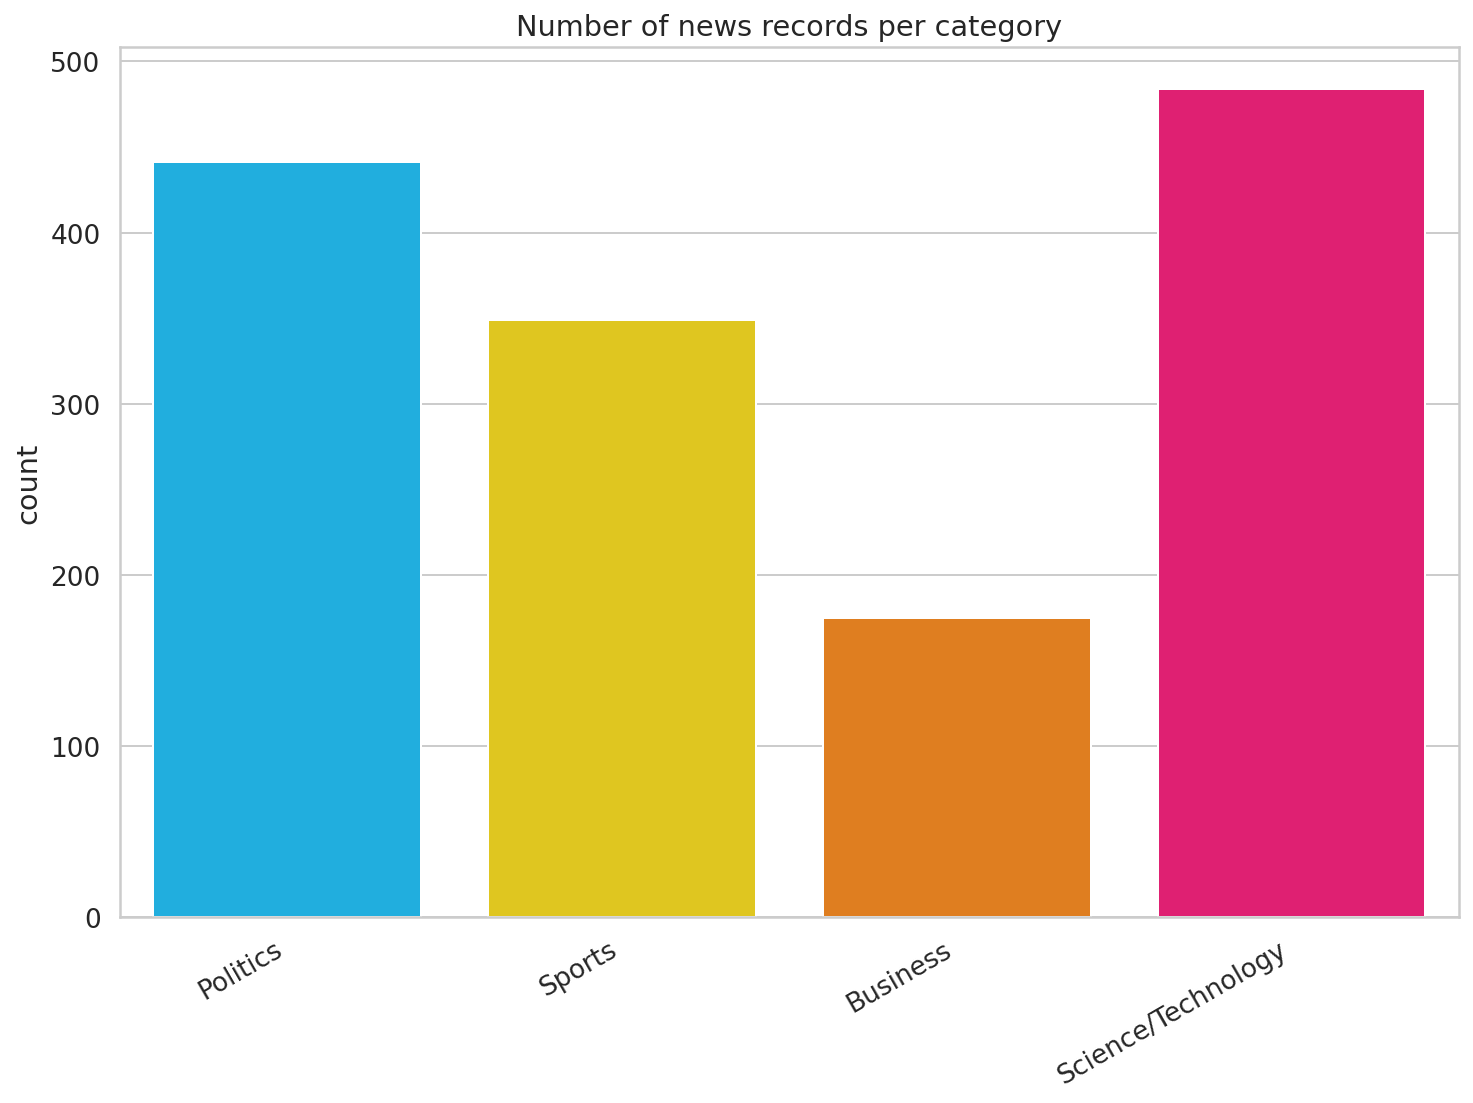

In [19]:
chart = sns.countplot(np.array(data['Category']), palette=HAPPY_COLORS_PALETTE)
plt.title("Number of news records per category")
chart.set_xticklabels(chart.get_xticklabels(), rotation=30, horizontalalignment='right');

In [20]:
data=data.reindex(np.random.permutation(data.index))
def encode(x):
    return Labels[int(x)]
# data['product']=data['product'].apply(lambda x: encode(x))
y = data['Category'].values
x= data['Summary'].values
type(x)
print(x.shape,y.shape)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25, random_state=1000, stratify=y)



(1449,) (1449,)


In [ ]:
# x_train=x_train.tolist()
# x_test=x_test.tolist()
# y_train=y_train.tolist()
# y_test=y_test.tolist()

(145,) (145,)


## Data to Arrays:

In [ ]:
# categories=np.unique(y).tolist()
# categories


In [21]:
#categories = ['alt.atheism', 'soc.religion.christian',
#             'comp.graphics', 'sci.med']
#from sklearn.datasets import fetch_20newsgroups
#train_b = fetch_20newsgroups(subset='train',
#   categories=categories, shuffle=True, random_state=42)
#test_b = fetch_20newsgroups(subset='test',
#   categories=categories, shuffle=True, random_state=42)

print('size of training set: %s' % (len(x_train)))
print('size of validation set: %s' % (len(x_test)))
#print('classes: %s' % (train_b.target_names))

size of training set: 1086
size of validation set: 363


In [22]:
train_df=pd.DataFrame(x_train,columns=['Summary'])
train_df['Category']=y_train
train_df.head()

,Summary,Category
0,"MacCentral - Mac Publishing LLC, the publisher...",Science/Technology
1,The United States men's basketball team lost t...,Sports
2,MOSCOW (AP) -- A Russian cargo ship loaded wit...,Science/Technology
3,So what is the gap between Labour and the Tor...,Politics
4,Service Pack 2 for XP represents a sea change ...,Science/Technology


# New Section

In [23]:
test_df=pd.DataFrame(x_test,columns=['Summary'])
test_df['Category']=y_test
test_df.head()

,Summary,Category
0,WASHINGTON -- Rookie Andy Dorman didn't even h...,Sports
1,Students can decide the fate of MPs in some s...,Politics
2,AP - Britain granted its first license for hum...,Science/Technology
3,"SAN JOSE, Calif. (AP) -- The Norwegian hacker ...",Science/Technology
4,Tony Blair is urging European leaders to wake...,Politics


In [24]:
train_y=pd.DataFrame(y_train,columns=['Summary'])
train_y.value_counts()

Summary           
Science/Technology    363
Politics              330
Sports                262
Business              131
dtype: int64

## Load Bert model medium L 8 H 512

In [25]:
print(bert_m)

Bert_models/uncased_L-8_H-512_A-8.zip


In [ ]:
!unzip 'Bert_models/uncased_L-8_H-512_A-8.zip'

Archive:  Bert_models/uncased_L-8_H-512_A-8.zip
replace bert_model.ckpt.data-00000-of-00001? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: bert_model.ckpt.data-00000-of-00001  
replace bert_config.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: bert_config.json        
replace vocab.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: vocab.txt               
replace bert_model.ckpt.index? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: bert_model.ckpt.index   


In [26]:

bert_model_name="/uncased_L-8_H-512_A-8"

bert_ckpt_dir = bert_model_name
bert_ckpt_file =  "bert_model.ckpt"
bert_config_file = "bert_config.json"

## Preprocess Data

In [27]:
class Mydata:
  DATA_COLUMN = "Summary"
  LABEL_COLUMN = "Category"

  def __init__(self, train, test, tokenizer: FullTokenizer, classes, max_seq_len=192):
    self.tokenizer = tokenizer
    self.max_seq_len = 0
    self.classes = classes
    
    train, test = map(lambda df: df.reindex(df[Mydata.DATA_COLUMN].str.len().sort_values().index), [train, test])
    
    ((self.train_x, self.train_y), (self.test_x, self.test_y)) = map(self._prepare, [train, test])

    print("max seq_len", self.max_seq_len)
    self.max_seq_len = min(self.max_seq_len, max_seq_len)
    self.train_x, self.test_x = map(self._pad, [self.train_x, self.test_x])

  def _prepare(self, df):
    x, y = [], []
    
    for _, row in tqdm(df.iterrows()):
      text, label = row[Mydata.DATA_COLUMN], row[Mydata.LABEL_COLUMN]
      tokens = self.tokenizer.tokenize(text)
      tokens = ["[CLS]"] + tokens + ["[SEP]"]
      token_ids = self.tokenizer.convert_tokens_to_ids(tokens)
      self.max_seq_len = max(self.max_seq_len, len(token_ids))
      x.append(token_ids)
      y.append(self.classes.index(label))

    return np.array(x), np.array(y)

  def _pad(self, ids):
    x = []
    for input_ids in ids:
      input_ids = input_ids[:min(len(input_ids), self.max_seq_len - 2)]
      input_ids = input_ids + [0] * (self.max_seq_len - len(input_ids))
      x.append(np.array(input_ids))
    return np.array(x)

In [28]:
tokenizer=FullTokenizer(vocab_file="vocab.txt")

In [29]:
tokenizer.tokenize("This is a TEST statement for tokenizer!")

['this', 'is', 'a', 'test', 'statement', 'for', 'token', '##izer', '!']

In [30]:
tokens = tokenizer.tokenize("This is a TEST statement fot tokenizer!")
tokenizer.convert_tokens_to_ids(tokens)

[2023, 2003, 1037, 3231, 4861, 1042, 4140, 19204, 17629, 999]

In [ ]:
import torch
torch.save(tokenizer, 'models/tokenizer')

saved_tokenizer = torch.load('models/tokenizer')

In [31]:
classes = train_df['Category'].unique().tolist()

data = Mydata(train_df, test_df, tokenizer, classes, max_seq_len=512)

1086it [00:03, 278.03it/s]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
363it [00:01, 258.75it/s]

max seq_len 5295


In [32]:
data.train_x[1]

array([  101, 21358,  2361,  1011,  2655,  2068,  1996,  1000, 10103,
        2136,  1000,  1012,   102,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [33]:
data.train_y[1]

1

In [34]:
data.max_seq_len

512

##  Create a Transformer Model:

In [35]:
def create_model(max_seq_len, bert_ckpt_file):

  with tf.io.gfile.GFile(bert_config_file, "r") as reader:
      bc = StockBertConfig.from_json_string(reader.read())
      bert_params = map_stock_config_to_params(bc)
      bert_params.adapter_size = None
      bert = BertModelLayer.from_params(bert_params, name="bert")
        
  input_ids = keras.layers.Input(shape=(max_seq_len, ), dtype='int32', name="input_ids")
  bert_output = bert(input_ids)

  print("bert shape", bert_output.shape)

  cls_out = keras.layers.Lambda(lambda seq: seq[:, 0, :])(bert_output)
  cls_out = keras.layers.Dropout(0.5)(cls_out)
  logits = keras.layers.Dense(units=512, activation="tanh")(cls_out)
  logits = keras.layers.Dropout(0.5)(logits)
  logits = keras.layers.Dense(units=len(classes), activation="softmax")(logits)

  model = keras.Model(inputs=input_ids, outputs=logits)
  model.build(input_shape=(None, max_seq_len))

  load_stock_weights(bert, bert_ckpt_file)
        
  return model

In [36]:
model = create_model(data.max_seq_len, bert_ckpt_file)

bert shape (None, 512, 512)
Done loading 132 BERT weights from: bert_model.ckpt into <bert.model.BertModelLayer object at 0x7fd16b5fc650> (prefix:bert). Count of weights not found in the checkpoint was: [0]. Count of weights with mismatched shape: [0]
Unused weights from checkpoint: 
	bert/embeddings/token_type_embeddings
	bert/pooler/dense/bias
	bert/pooler/dense/kernel
	cls/predictions/output_bias
	cls/predictions/transform/LayerNorm/beta
	cls/predictions/transform/LayerNorm/gamma
	cls/predictions/transform/dense/bias
	cls/predictions/transform/dense/kernel
	cls/seq_relationship/output_bias
	cls/seq_relationship/output_weights


In [37]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_ids (InputLayer)       [(None, 512)]             0         
_________________________________________________________________
bert (BertModelLayer)        (None, 512, 512)          41109504  
_________________________________________________________________
lambda (Lambda)              (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 2052  

In [38]:
model.compile(
  keras.optimizers.Adam(1e-5),
  loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  # loss=keras.losses.sparse_categorical_crossentropy(),
  metrics=[keras.metrics.SparseCategoricalAccuracy(name="acc")]
)

In [39]:
log_dir = path+"classification_/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%s")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir)

history = model.fit(
  x=data.train_x, 
  y=data.train_y,
  validation_split=0.2,
  batch_size=16,
  shuffle=True,
  epochs=15,
  callbacks=[tensorboard_callback]
)

""" max_seq:200
Epoch 1/5
551/551 [==============================] - 228s 392ms/step - loss: 2.5894 - acc: 0.1452 - val_loss: 0.8752 - val_acc: 0.6639
Epoch 2/5
551/551 [==============================] - 213s 386ms/step - loss: 1.3217 - acc: 0.5511 - val_loss: 0.6832 - val_acc: 0.7528
Epoch 3/5
551/551 [==============================] - 212s 386ms/step - loss: 0.9776 - acc: 0.6688 - val_loss: 0.6783 - val_acc: 0.7722
Epoch 4/5
551/551 [==============================] - 212s 386ms/step - loss: 0.7947 - acc: 0.7350 - val_loss: 0.6325 - val_acc: 0.7824
Epoch 5/5
551/551 [==============================] - 213s 386ms/step - loss: 0.6823 - acc: 0.7711 - val_loss: 0.6151 - val_acc: 0.7845
"""

Train on 868 samples, validate on 218 samples
Epoch 1/15
868/868 [==============================] - 114s 132ms/sample - loss: 1.3313 - acc: 0.3733 - val_loss: 1.3108 - val_acc: 0.5229
Epoch 2/15
868/868 [==============================] - 94s 108ms/sample - loss: 1.2119 - acc: 0.5276 - val_loss: 1.1078 - val_acc: 0.9312
Epoch 3/15
868/868 [==============================] - 94s 109ms/sample - loss: 1.1968 - acc: 0.5357 - val_loss: 1.0818 - val_acc: 0.9541
Epoch 4/15
868/868 [==============================] - 94s 108ms/sample - loss: 1.1470 - acc: 0.5933 - val_loss: 1.1317 - val_acc: 0.8532
Epoch 5/15
868/868 [==============================] - 94s 108ms/sample - loss: 0.9850 - acc: 0.7650 - val_loss: 1.1471 - val_acc: 0.7661
Epoch 6/15
868/868 [==============================] - 94s 109ms/sample - loss: 0.9427 - acc: 0.8018 - val_loss: 1.1605 - val_acc: 0.7248
Epoch 7/15
868/868 [==============================] - 94s 108ms/sample - loss: 0.9353 - acc: 0.8065 - val_loss: 1.1184 - val_acc: 0

' max_seq:200\nEpoch 1/5\n551/551 [==============================] - 228s 392ms/step - loss: 2.5894 - acc: 0.1452 - val_loss: 0.8752 - val_acc: 0.6639\nEpoch 2/5\n551/551 [==============================] - 213s 386ms/step - loss: 1.3217 - acc: 0.5511 - val_loss: 0.6832 - val_acc: 0.7528\nEpoch 3/5\n551/551 [==============================] - 212s 386ms/step - loss: 0.9776 - acc: 0.6688 - val_loss: 0.6783 - val_acc: 0.7722\nEpoch 4/5\n551/551 [==============================] - 212s 386ms/step - loss: 0.7947 - acc: 0.7350 - val_loss: 0.6325 - val_acc: 0.7824\nEpoch 5/5\n551/551 [==============================] - 213s 386ms/step - loss: 0.6823 - acc: 0.7711 - val_loss: 0.6151 - val_acc: 0.7845\n'

## Evaluation:

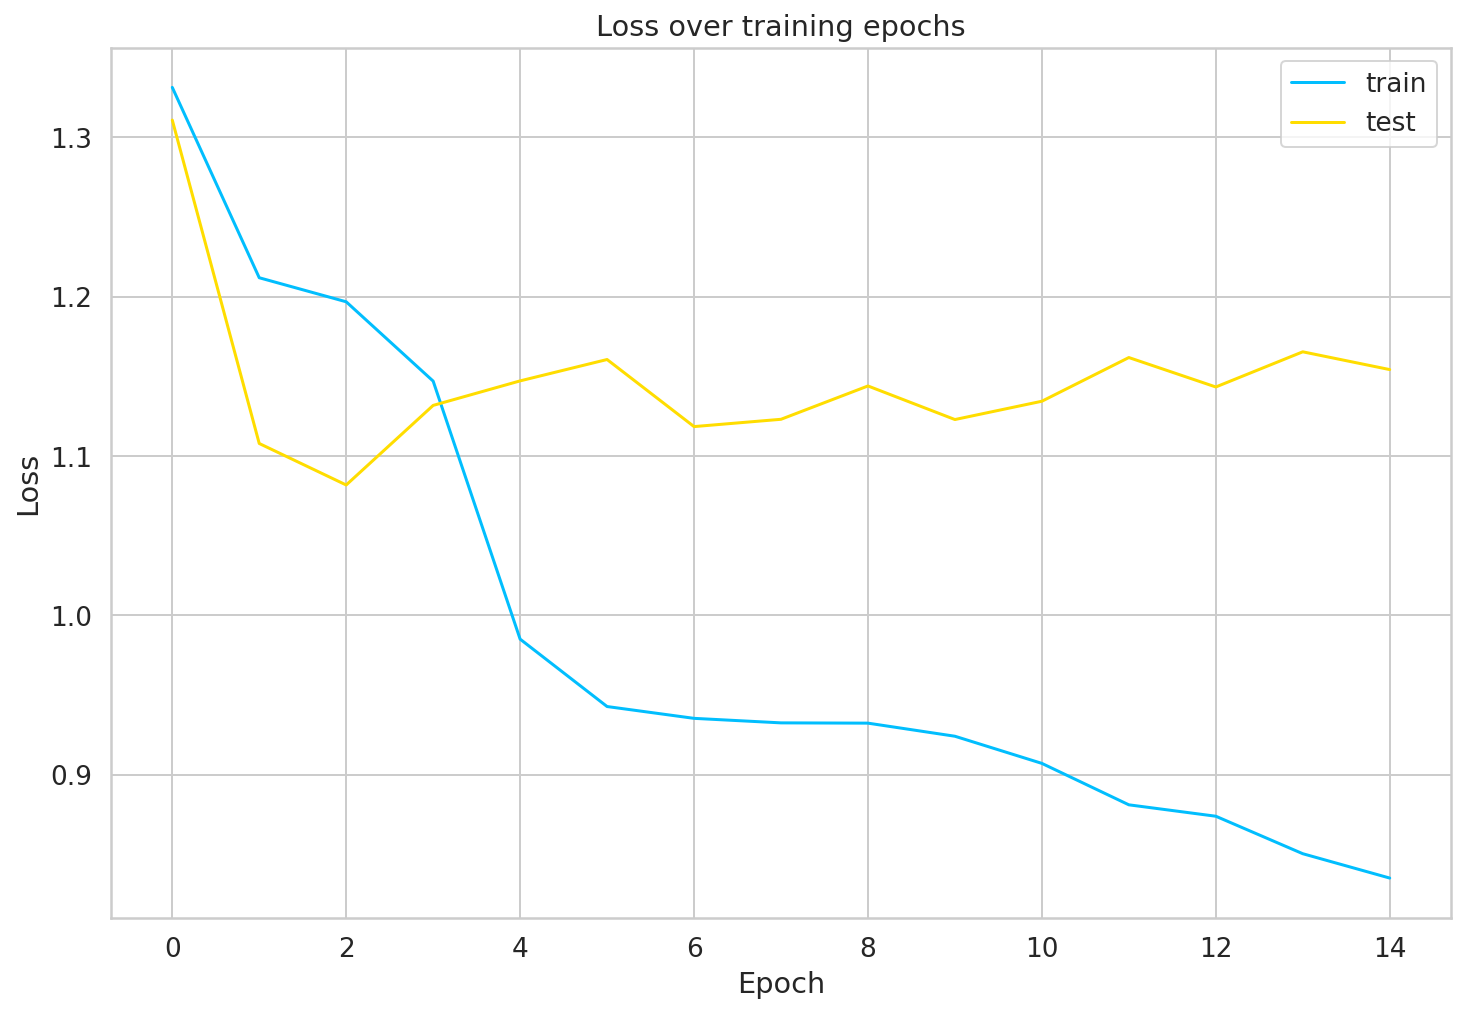

In [40]:
ax = plt.figure().gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

ax.plot(history.history['loss'])
ax.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'])
plt.title('Loss over training epochs')
plt.show();

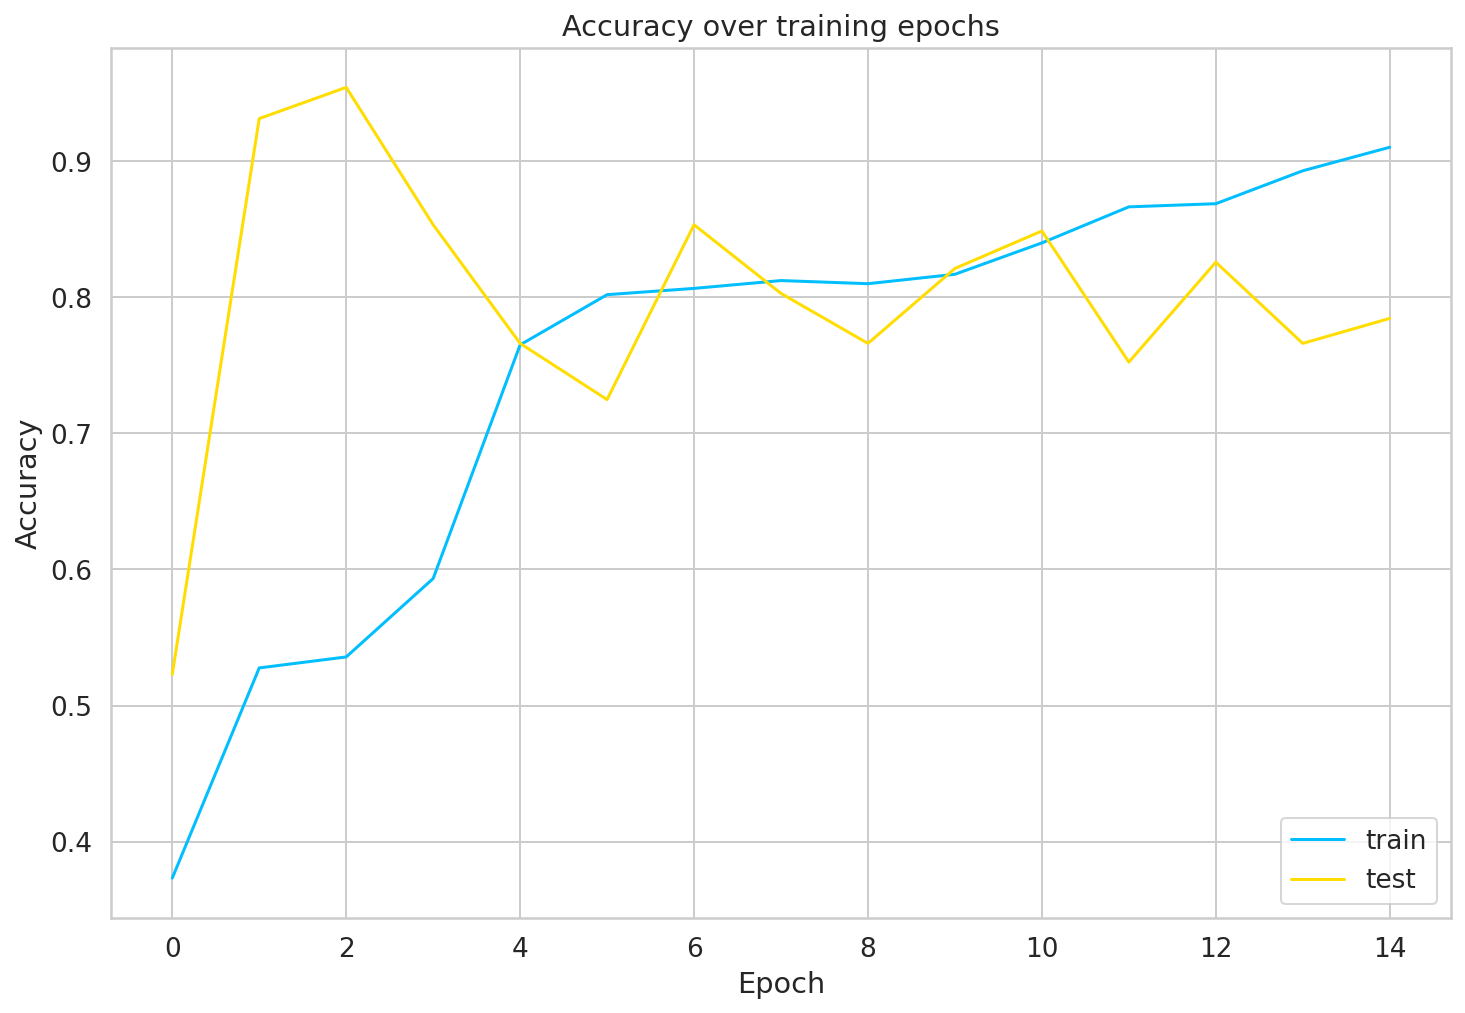

In [41]:
ax = plt.figure().gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

ax.plot(history.history['acc'])
ax.plot(history.history['val_acc'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'])
plt.title('Accuracy over training epochs')
plt.show();

In [42]:
_, train_acc = model.evaluate(data.train_x, data.train_y)
_, test_acc = model.evaluate(data.test_x, data.test_y)

print("train acc", train_acc)
print("test acc", test_acc)

1086/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [43]:
y_pred = model.predict(data.test_x).argmax(axis=-1)

In [44]:
print(classification_report(data.test_y, y_pred, target_names=classes))

                    precision    recall  f1-score   support

Science/Technology       0.78      0.98      0.87       121
            Sports       0.89      0.78      0.83        87
          Politics       0.99      0.83      0.90       111
          Business       0.53      0.52      0.53        44

          accuracy                           0.83       363
         macro avg       0.80      0.78      0.78       363
      weighted avg       0.84      0.83      0.83       363



In [45]:
cm = confusion_matrix(data.test_y, y_pred)
df_cm = pd.DataFrame(cm, index=classes, columns=classes)

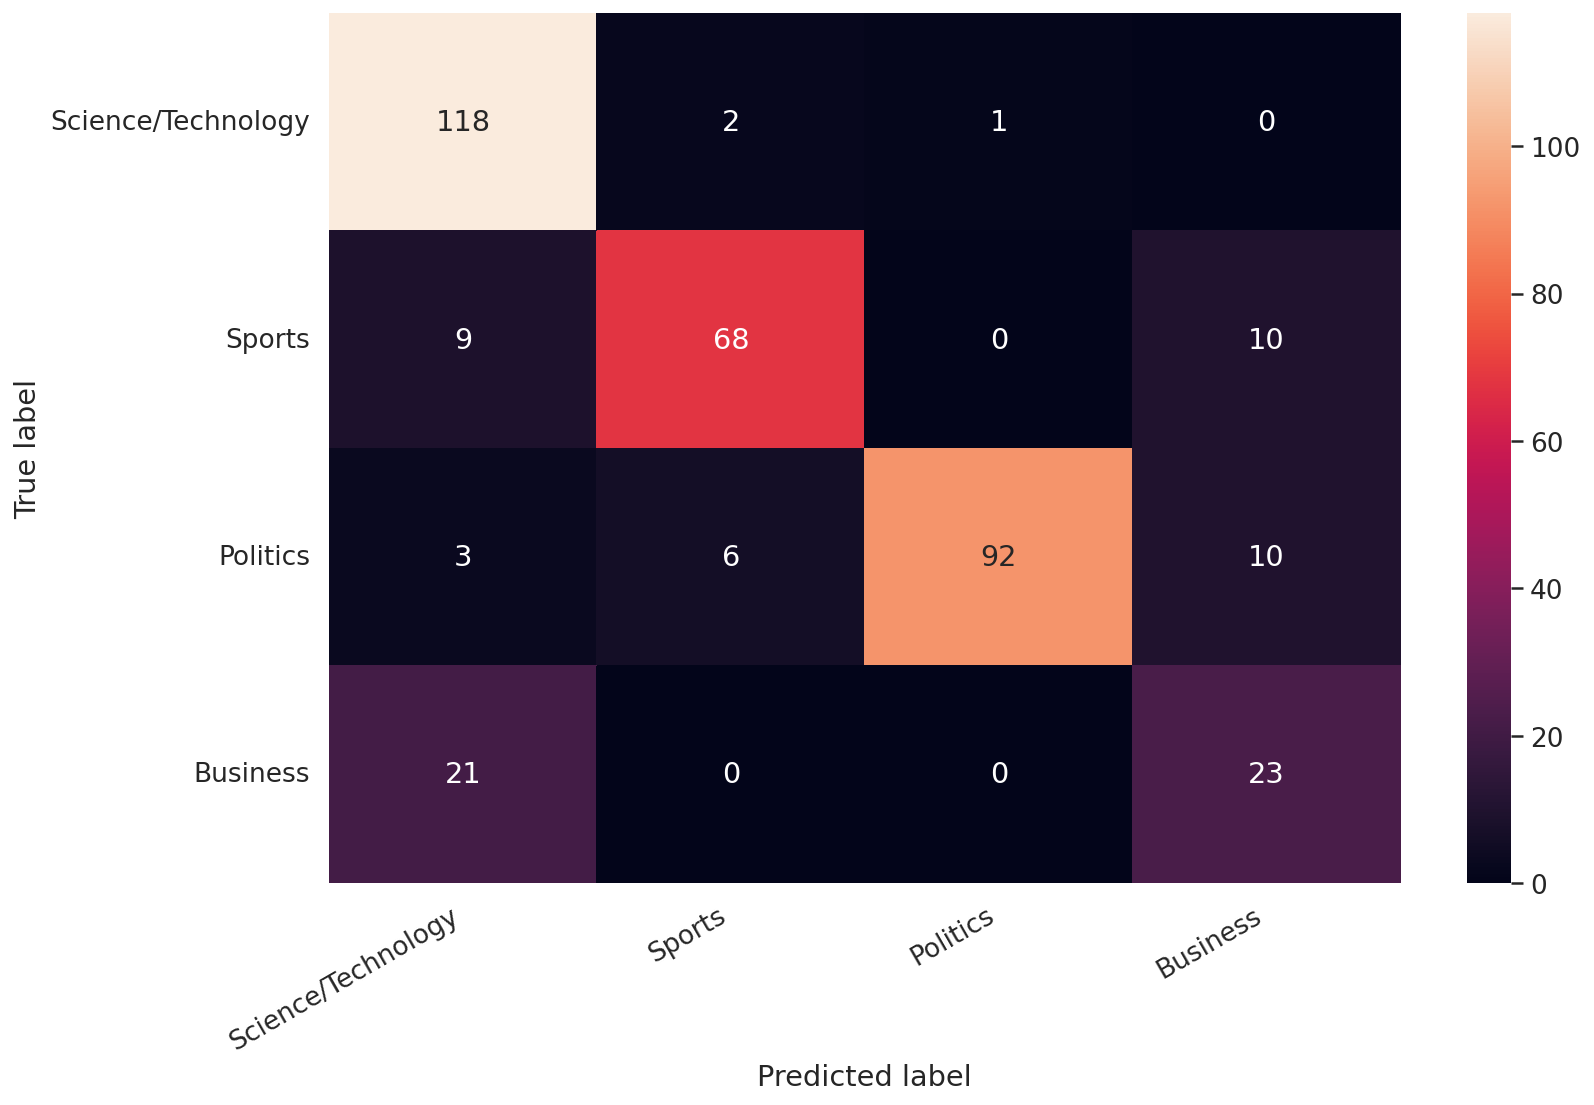

In [46]:
hmap = sns.heatmap(df_cm, annot=True, fmt="d")
hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
plt.ylabel('True label')
plt.xlabel('Predicted label');

In [47]:
model.save('models/bert_model.h5')

In [6]:
from tensorflow.keras.models import load_model
import bert
saved_model = load_model("models/bert_model.h5",custom_objects={"BertModelLayer": bert.BertModelLayer})

In [7]:
import torch
saved_tokenizer = torch.load('models/tokenizer')

## Live Inference:

In [10]:
sentences = [
  "child access laws shake-up parents who refuse to allow former partners contact with their children could be electronically tagged under plans being considered by ministers. curfews and community service orders were other options which could be used if court orders to allow parental access were defied  lord falconer said. the constitutional affairs secretary outlined some of the plans on tuesday. he denied fathers  activists had forced the changes  telling the bbc  there is a recognition that something is wrong . between 15 000 and 20 000 couples go to court to resolve access disputes each year  although in nine out of 10 separations there is no court intervention.  lord falconer told bbc radio 4 s today programme he hoped voluntary mediation could help solve disputes before they reached court. but he opposed compulsory mediation  saying that it would lead to many people taking part with the wrong attitude. other plans include:    - parenting plans to give advice on access arrangements  based on real-life examples that have worked in the past   - extending in-court conciliation - more informal hearings before contested court cases   - better access to legal  emotional and practical advice by telephone and internet   - legal aid changes to give incentives for early resolution of disputes.     judges can already jail parents who breach contact orders but that was a  nuclear option  which was rarely used as it was not seen as being in the child s interests  a spokesman said. the aim of the n",
  "Today is India vs Pakistan, T20 World Cup match"
]

max_seq_len = 512
classes = ['Science/Technology', 'Sports', 'Politics', 'Business']

pred_tokens = map(saved_tokenizer.tokenize, sentences)
pred_tokens = map(lambda tok: ["[CLS]"] + tok + ["[SEP]"], pred_tokens)
pred_token_ids = list(map(saved_tokenizer.convert_tokens_to_ids, pred_tokens))

# pred_token_ids = map(lambda tids: tids +[0]*(data.max_seq_len-len(tids)),pred_token_ids)
pred_token_ids = map(lambda tids: tids +[0]*(max_seq_len-len(tids)),pred_token_ids)
pred_token_ids = np.array(list(pred_token_ids))

predictions = saved_model.predict(pred_token_ids).argmax(axis=-1)

for text, label in zip(sentences, predictions):
  print("text:", text, "\nintent:", classes[label])

text: child access laws shake-up parents who refuse to allow former partners contact with their children could be electronically tagged under plans being considered by ministers. curfews and community service orders were other options which could be used if court orders to allow parental access were defied  lord falconer said. the constitutional affairs secretary outlined some of the plans on tuesday. he denied fathers  activists had forced the changes  telling the bbc  there is a recognition that something is wrong . between 15 000 and 20 000 couples go to court to resolve access disputes each year  although in nine out of 10 separations there is no court intervention.  lord falconer told bbc radio 4 s today programme he hoped voluntary mediation could help solve disputes before they reached court. but he opposed compulsory mediation  saying that it would lead to many people taking part with the wrong attitude. other plans include:    - parenting plans to give advice on access arrange

In [ ]:
!pip freeze > requirements.txt